<a href="https://colab.research.google.com/github/AndresCesana/Electronica-Analogica-III/blob/main/C%C3%B3digo_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo práctico 3 Electrónica Analógica III**

In [ ]:
# Cesana Andrés Agustín
# Pieckenstainer Mateo
# Ricci Matías
# Trucchi Genaro

# **Se abordará el cálculo de la función de transferencia de un PLL Phase Locked Loop**

In [ ]:
# Instala solo la primera vez
!pip install control --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.1 MB/s eta 0:00:00


# **Librerias**

In [ ]:
# Librerías utilizdas
import numpy as np
import matplotlib.pyplot as plt
import control as ctl          # librería python-control

# **Datos de nuestro PLL**

In [ ]:
# Frecuencias
fmin = 128.7e6     # Hz
fmax = 146.7e6
fr   = 10.7e6
fsep = 25e3
# Ventana de sintonía del VCO (Hz → Volts)
Kv_Hz = 10e6       # Hz/V
Kd_Hz = 0.26       # V/Hz
Kv = Kv_Hz * 2*np.pi   # rad/s per V
Kd = Kd_Hz * 2*np.pi   # V/rad
# Parámetros de diseño
psi   = 0.3
wn    = 4.5 / 1e-3     # rad/s
# --- Calculo divisor integer-N --------------------
N = int(round(fmax / fr))
print("Divisor N =", N)

Divisor N = 14


# **Función de transferencia del filtro**

In [ ]:
# --- Filtro de lazo --------------------------------
t2 = (2*psi/wn) - N/(Kd*Kv)
t1 = (Kd*Kv)/(N*wn**2) - t2
assert t2 > 0, "t2 negativo: revisá Kv, Kd o C"

C  = 100e-9
R1, R2 = t1/C, t2/C
print(f"R1 = {R1/1e3:.2f} kΩ | R2 = {R2/1e3:.2f} kΩ")

s = ctl.TransferFunction.s
F  = (1 + s*t2) / (1 + s*(t1+t2))


R1 = 3619.26 kΩ | R2 = 1.33 kΩ


# **Función de transferencia del PLL**

In [ ]:
# --- Transferencia PLL cerrada --------------------
G_open = Kd * Kv / s * F
H_div  = 1/N
PLL_tf = ctl.minreal(G_open / (1 + G_open*H_div))


2 states have been removed from the model


# **Gráficos**

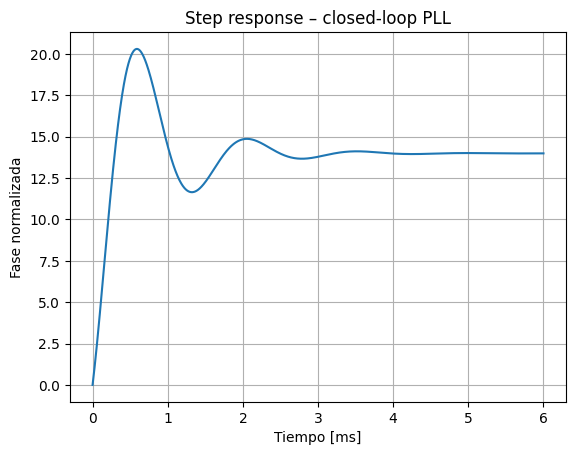

In [ ]:
# --- Respuesta ------------------------------------
t_step = np.linspace(0, 6e-3, 2000)
t_out, y_out = ctl.step_response(PLL_tf, T=t_step)

plt.plot(t_out*1e3, y_out)
plt.xlabel("Tiempo [ms]"); plt.ylabel("Fase normalizada")
plt.title("Step response – closed-loop PLL")
plt.grid(); plt.show()